In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from knn import KNN
import seaborn as sns

In [13]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['targets'] = pd.Series(iris.target)
df['Iris_name'] = df['targets'].apply(lambda x: 'setosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets,Iris_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, shuffle=True)

In [16]:
print('x, y train:', x_train.shape, y_train.shape)
print('x, y test:', x_test.shape, y_test.shape)

x, y train: (120, 4) (120,)
x, y test: (30, 4) (30,)


In [17]:
knn = KNN(7)
knn.fit(x_train, y_train)

In [18]:
accuracy = knn.evaluate(x_test, y_test)
accuracy


0.26666666666666666

In [20]:
# Calculate confusion matrix for test dataset
print('total data:', len(iris.data))
print('test data:', len(x_test))

total data: 150
test data: 30


In [21]:
Y_prediction = knn.predict(x_test)
print(Y_prediction)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 1 1 2 1 0 2 1 1 2 1 1 0 1 2 0 2 0 1 0 1 1 2 2 2 2 0 1 0 0]


In [10]:
print('accuracy;', accuracy_score(y_test, Y_prediction))

accuracy; 0.2


confusion matrix:
[[ 8  0  0]
 [12  0  0]
 [10  0  0]]


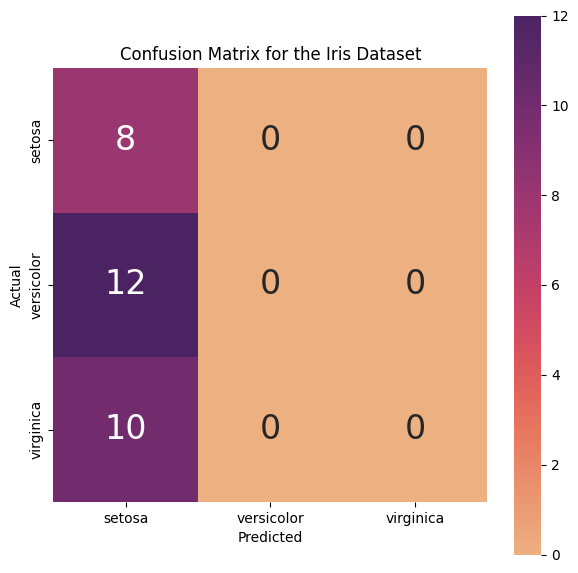

In [22]:
conf_mat = confusion_matrix(y_test, Y_prediction)
print("confusion matrix:", conf_mat, sep="\n")

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax = sns.heatmap(conf_mat, annot=True, square=True , xticklabels=iris.target_names  ,  yticklabels=iris.target_names  ,  fmt='g', cmap="flare" , annot_kws={"size": 24})
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix for the Iris Dataset')
plt.show()